<a href="https://colab.research.google.com/github/reeruryu/VISIONEERS_study/blob/main/w01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.1 Hello World**

In [ ]:
print('Hello, World!')

Hello, World!


# **3.2 Hello 텐서플로 2.0 (2.8 ...)**

텐서플로 시작티비~

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# **3.3 텐서플로 기초**

기초인 AND, OR, XOR 연산을 만들어보자



## 3.3.1 난수 생성

랜덤은 신경망에서 꼬 옥 필요한 기능이다.

현재 가장 많이 쓰이는 방법은 Xavier 초기화와 He 초기화이다

그러나 단순하게 난수를 지정해보도록 하자

균일 분포를 얻는 법!!!

In [ ]:
rand = tf.random.uniform([1],0,1)
# 인자에 차례대로 shape, minVal, maxVal 
print(rand)

tf.Tensor([0.7108387], shape=(1,), dtype=float32)


In [ ]:
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.6758883  0.35619736 0.19937968 0.1785593 ], shape=(4,), dtype=float32)


정규 분포를 얻는 법!!!!!!!

In [ ]:
rand = tf.random.normal([4],0,1)
# 인자에 차례대로 shape, mean, standard deviation
print(rand)

tf.Tensor([ 1.2252303 -1.1042148 -0.6384326 -1.2167848], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

신경망의 가장 기본적인 구성요소인 뉴런을 만들어보자

뉴런이 여러 개 모이면 레이어, 레이어가 모이면 신경망이라고 보면 ez하다


뉴런은 입력(X), 가중치(w), 활성화함수(f), 출력(Y)으로 구성된다

가장 간단한 형태의 뉴런은 입력에 가중치를 곱한 뒤(행렬의 곱셈)

활성화함수를 취하면 출력을 얻을 수 있다

Y=f(X*w)

뉴런에서 학습할 때 변하는 것은 가 중 치이다

그러니까 원하는 출력에 점점 가깝게 하려며는 좋은 가중치를 얻음 된다

활성화 함수로는 sigmoid, ReLU 등이 있다

sigmoid

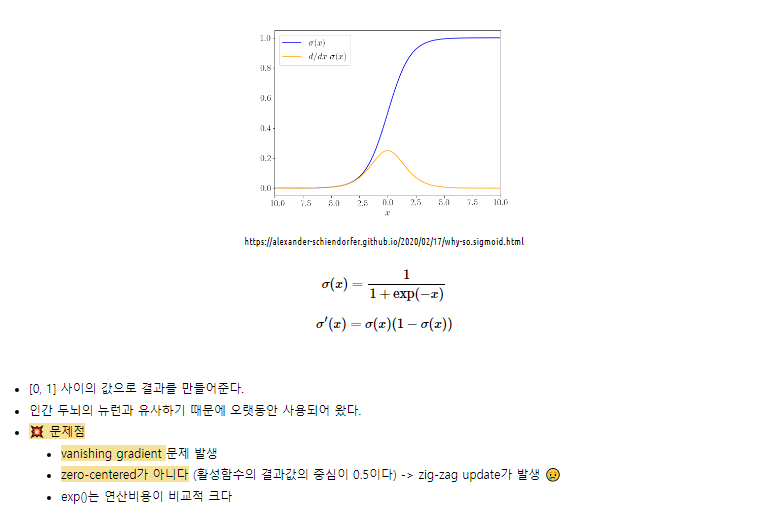

ReLU

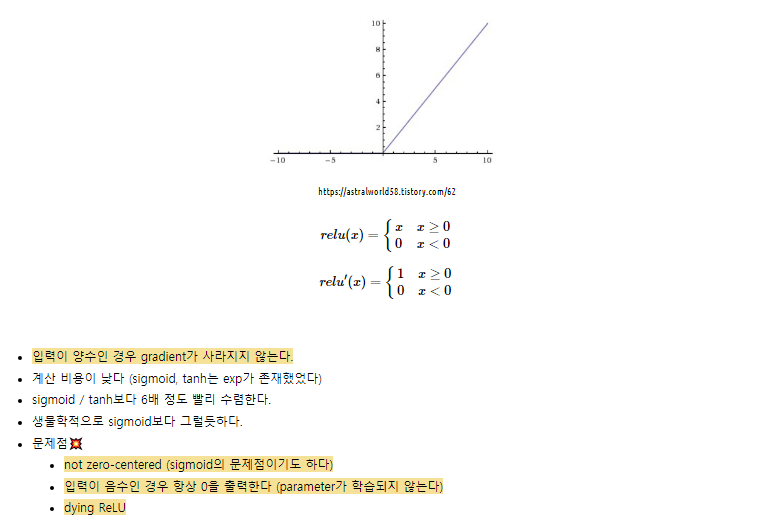


In [ ]:
# 시그모이드 함수 구현
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
x=1 # 입력
y=0 # 기대출력
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

# 에러 - 실제출력과 기대출력 차이
err = y-output
print(err)

0.42449998609476003
-0.42449998609476003


경사 하강법(Gradient Descent) 로 가중치 업데이트를 진행하자


w = w + x * lr * error


자세한 설명 링크 ♡ https://blog.naver.com/jamsuham75/222187585198


In [ ]:
for i in range(1000):
  output = sigmoid(x*w)
  error = y-output
  w = w+x*0.1*error

  if i % 100 ==99:
    print(i, error, output)

99 -0.09620498859203966 0.09620498859203966
199 -0.050668183607247834 0.050668183607247834
299 -0.034080571223834524 0.034080571223834524
399 -0.02560052359940766 0.02560052359940766
499 -0.020473277713197135 0.020473277713197135
599 -0.017045445082691117 0.017045445082691117
699 -0.014594944940894326 0.014594944940894326
799 -0.012757199742456045 0.012757199742456045
899 -0.01132850595142544 0.01132850595142544
999 -0.010186336720646687 0.010186336720646687


In [ ]:
x=0 # 입력
y=1 # 기대출력
w = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error # 입력이 0이기 때문에 변하는 게 없음

  if i % 100 == 99:
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


위 경우같이 가중치가 update가 안되는 거슬 방지하기 위해 편향(bias)이라는 것을 뉴런에 넣어준다

편향의 입력으로는 보편적으로 쓰이는 1을 넣는다.

편향은 w처럼 난수로 초기화되며 뉴런에 더해져서 출력을 계산하게 된다.

Y=f(X * w + 1 * b)

In [ ]:
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.08445229977867785 0.9155477002213221
199 0.047068347373910746 0.9529316526260893
299 0.032388342717702856 0.9676116572822971
399 0.0246262789954792 0.9753737210045208
499 0.019842473852730746 0.9801575261472693
599 0.016604534150999717 0.9833954658490003
699 0.014269775263573314 0.9857302247364267
799 0.012507591057257406 0.9874924089427426
899 0.011131000076712083 0.9888689999232879
999 0.010026204401088368 0.9899737955989116


## 3.3.3 첫 번째 신경망 네트워크: AND

Y = f(X1 * w1 + X2 * w2 + 1* b)

In [ ]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4): # len(x)
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    # ex) sum([1 1] * tf.Tensor([w1 w2]))
    error = y[j][0] - output # 껍데기 벗겨주기 ..
    # ex) 1 - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.1039261519409831
399 -0.06340555764151984
599 -0.04548792702138162
799 -0.035367016021134436
999 -0.028878529677510156
1199 -0.02437609562505874
1399 -0.021071707436556432
1599 -0.01854688353302351
1799 -0.016557232486820582
1999 -0.014948001354128207


In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.965103410462683
X: [1 0] Y: [0] Output: 0.024730698530698245
X: [0 1] Y: [0] Output: 0.024805691349224092
X: [0 0] Y: [0] Output: 2.3322291537831556e-05


## 3.3.4 두 번째 신경망 네트워크: OR

In [ ]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.0428383813550669
399 -0.0238822589177812
599 -0.01645759053019051
799 -0.012515602251336015
999 -0.01008043351556838
1199 -0.008430644655865294
1399 -0.0072405446512584515
1599 -0.006341912534106119
1799 -0.005640817217137363
1999 -0.005076903729166218


In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999973227763568
X: [1 0] Y: [1] Output: 0.9899237541504612
X: [0 1] Y: [1] Output: 0.9899182353298643
X: [0 0] Y: [0] Output: 0.025175500451730348


## 3.3.5 세 번째 신경망 네트워크: XOR

In [ ]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.0018027412928262043
399 -7.328686241603322e-05
599 -2.9857177503700427e-06
799 -1.3309160451502322e-07
999 4.653552654332316e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


에러 값이 어느 순간 변하지 않네요?

학습시킨 네트워크를 평가해봅시다

In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


X가 변해도 Output은 0.5 근처에서 머물고 있다

왤까 ㅋㅋ

w와 b를 출력해보자

In [ ]:
print('w:', w)
print('b:', b)

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


w 약 0.0512, -0.000000000745
b 약 0.000000000373

가중치2와 편향은 영향을 거의 미치지 않는다

AND 네트워크의 가중치가 하려는 작업은 XOR 네트워크에 비해 분명했다

해 결 책으로는

여러 개의 퍼셉트론을 사용하자

In [8]:
import tensorflow as tf
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

# 코드가 복잡해지는 것을 막기 위해 tf.keras 사용
# 시퀀셜 모델 사용 인자에 레이어 차곡차곡
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
# layers.Dense 인자 차례대로 뉴런 수, 활성화함수, 입력의 차원 수(첫 번째 레이어만 해당)

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
# compile인자 차례대로 최적화 함수, 손실

model.summary() # 네트워크의 구조를 알아보기 쉽게 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


최적화 함수 맛보기

걍 기울기 0 가까운 거 찾아가는 방법 중 하나이다

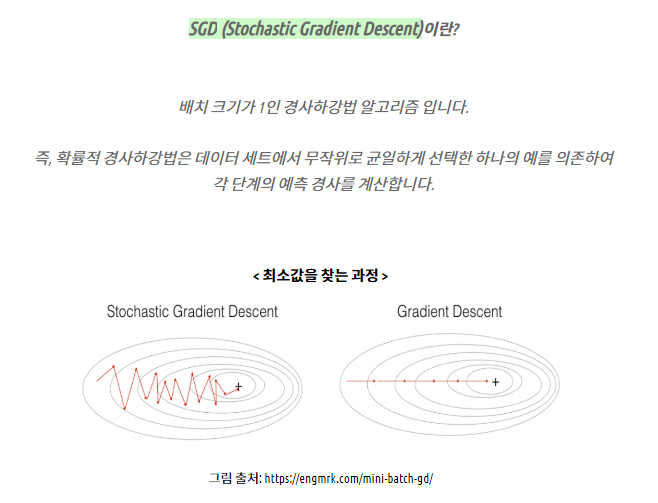

In [9]:
# 네트워크 학습시키기
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2598
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2587
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2578
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2562
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2556
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2552
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2545
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2544
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 13/2000
4/4 [==============================

epoch, batch, iteration 설명 : 
https://gooopy.tistory.com/68


In [10]:
# 네트워크 평가
model.predict(x)

array([[0.15343457],
       [0.8675668 ],
       [0.86840683],
       [0.12594676]], dtype=float32)

결과가 멋지게 변했다

가중치를 다시 봐 보자

In [11]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[5.142732 , 2.82958  ],
       [5.305386 , 2.8556085]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-1.9052459, -4.284124 ], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 5.8947763],
       [-6.21333  ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-2.6162589], dtype=float32)>


In [ ]:
편향과 연결된 가중치는 bias이고 나머지는 kernel이다

가중치가 멋지게 바뀌었다

# **3.4 시각화 기초**

## 3.4.1 matplotlib.pyplot을 이용한 그래프 그리기

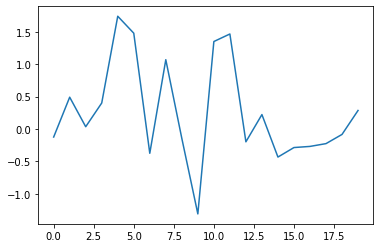

In [12]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

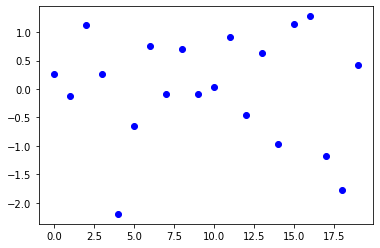

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y, 'bo')
plt.show()

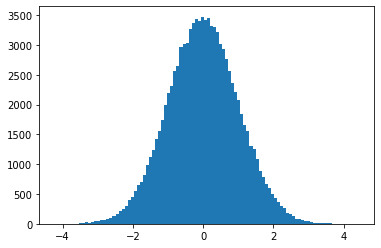

In [15]:
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000], 0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

선 그래프를 이용해 XOR 네트워크의 손실이 어떻게 변했는지 시각화해보자

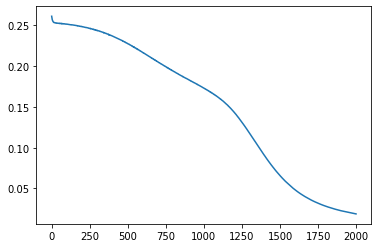

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])